# Géométrie et espaces de formes - TP 1


## 1. Noyaux reproduisants et interpolation


### Noyaux reproduisants

Soit $H$ un espace de Hilbert de fonctions $f:{\mathbb R}^d\rightarrow{\mathbb R}$. $H$ est un espace à noyau reproduisant s'il existe une fonction
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ telle que $\forall x\in{\mathbb R}^d, K_H(\cdot,x)\in H$, et 

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ est alors défini de façon unique et est appelé noyau reproduisant de $H$. On peut remarquer que l'on a la propriété suivante (propriété reproduisante) :

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Inversement, il est possible, à partir d'une fonction $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ de type positif, de construire l'unique espace de Hilbert $H$ de fonctions tel que $K_H=K$.

### Un premier exemple : espace de Sobolev $H^1({\mathbb R})$

L'espace de Sobolev $H^1({\mathbb R})$ est l'espace des fonctions de $L^2({\mathbb R})$ dont la dérivée au sens faible appartient aussi à $L^2({\mathbb R})$. En fait tout élément de $H^1({\mathbb R})$ admet un représentant continu et on peut aussi définir $H^1({\mathbb R})$
de façon classique comme l'espace des fonctions $f:{\mathbb R}\rightarrow{\mathbb R}$ continues, de carré intégrable, dérivables presque partout et telles que $\int_x^yf'(t)dt=f(y)-f(x)$ pour tous réels $x,y$. Sur cet espace on définit habituellement le produit scalaire
$$\langle f,g\rangle_{H^1} = \int_{\mathbb R} f(t)g(t)+f'(t)g'(t)\;dt,$$
mais on peut aussi définir plus généralement pour une échelle $\sigma>0$ fixée,
$$\langle f, g\rangle_{H^1_\sigma} = \int_{\mathbb R} f(t)g(t)+\sigma^2f'(t)g'(t)\;dt.$$
On note $H^1_\sigma$ l'espace $H^1({\mathbb R})$ muni de ce produit scalaire. C'est un espace de Hilbert.

__Question 1__ : Montrer que $H^1_\sigma$ est un espace à noyau reproduisant dont le noyau est la fonction $K_\sigma:{\mathbb R}^2\rightarrow{\mathbb R}$ définie par

$$\forall x,y\in{\mathbb R},\quad K_\sigma(x,y)=\frac1{2\sigma}e^{-\frac{|x-y|}\sigma}.$$

Pour que $H^1_\sigma$ soit l'ENR du noyau $K_\sigma$, il doit vérifier deux propriétés : 
1. $K_\sigma(\cdot,y) \in H_\sigma^1 \quad \forall y \in \chi$
2. Propriété de reproduction : $\langle f, K_\sigma(\cdot, y) \rangle_{H_\sigma^1} = f(y)$.

La première propriété est évidemment vraie, tandis que la seconde demande un peu plus d'attention. Calculons $\langle f, K_\sigma(\cdot, y) \rangle_{H_\sigma^1}$. On sépare, pour $y$ fixé, le cas $x > y$ et le cas $x < y$ dans l'intégrale. De plus, 
\begin{equation*}
\begin{aligned}
    K_\sigma(x,y)' = \frac{1}{\sigma}K_\sigma(x,y) \quad \text{if} \quad x < y \\
    K_\sigma(x,y)' = - \frac{1}{\sigma}K_\sigma(x,y) \quad \text{if} \quad x > y
\end{aligned}
\end{equation*}
où $'$ est la dérivée par rapport à la variable x. Donc 
\begin{equation*}
\int_{\mathbb{R}}\sigma^2f'(x)K_\sigma'(x,y)\;dx = \int_{-\infty}^y \sigma f'(x)K_\sigma(x,y)\;dx - \int_{y}^\infty \sigma f'(x)K_\sigma(x,y)\;dx
\end{equation*}
D'autre part, 
\begin{equation*}
\begin{aligned}
\int_{\mathbb R} f(t)K_\sigma(x,y)\;dx = \int_{-\infty}^y f(x)K_\sigma(x,y)\;dx + \int_{y}^\infty f(x)K_\sigma(x,y)\;dx \\
= [\frac{1}{2}f(x)\exp(\frac{x - y}{\sigma})]_{-\infty}^y + [-\frac{1}{2}f(x)\exp(\frac{y - x}{\sigma})]_{y}^\infty - \int_{-\infty}^y f(x)K_\sigma(x,y)\;dx + \int_{y}^\infty f(x)K_\sigma(x,y)\;dx
\end{aligned}
\end{equation*}

En sommant , on trouve bien la relation voulue, la somme des deux crochets étant $f(y)$.
$$
\langle f, K_\sigma(\cdot, y) \rangle_{H_\sigma^1} = \int_{\mathbb{R}}\sigma^2f'(x)K_\sigma'(x,y)\;dx + \int_{\mathbb R} f(t)K_\sigma(x,y)\;dx
$$
$$
 = [\frac{1}{2}f(x)\exp(\frac{x - y}{\sigma})]_{-\infty}^y + [-\frac{1}{2}f(x)\exp(\frac{y - x}{\sigma})]_{y}^{+\infty} = f(y)
$$

__Question 2__ : Vérifier numériquement la propriété du noyau : choisir par exemple $\sigma=2$, une fonction $f\in H^1_\sigma$ quelconque (par exemple $f(x)=e^{-x^2}$), un réel $x\in{\mathbb R}$ quelconque, puis calculer une valeur approchée de $\langle f, {K_\sigma(\cdot,x)}\rangle_{H^1_\sigma}$ par sommes et différences finies et comparer avec $f(x)$. Vérifier également numériquement la propriété reproduisante.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# fonction pour définir le noyau 
def KH1(x,y,sigma=1):
    return np.exp(-np.abs(x - y)/sigma)/(2*sigma)

# fonction pour définir le produit scalaire
def H1ScalProd(f,g,sigma=1):
    T = y + 10000 #Interval of integration
    N = 1000000 #number of points
    X = np.linspace(-T/2,T/2,N)
    delta_t = T/N
    deriv = np.array([(f(X[i+1]) - f(X[i]))/delta_t*(g(X[i+1], y) - g(X[i], y))/delta_t for i in range(len(X) - 1)])
    func = np.array([f(X[i])*g(X[i], y) for i in range(len(X))])
    return np.sum(deriv)*delta_t + np.sum(func)*delta_t
    # f et g sont deux fonctions python
    # doit renvoyer <f,g>_H1 calculé par sommes et différences finies

# définition des paramètres et fonctions à tester    
def f(x):
    return np.exp(-x**2/2)
y = 2

# test : valeur du produit scalaire <f,KH1(.,x)>_H1 et comparaison avec f(x)
print(H1ScalProd(f,KH1))
print(f(y))

# vérification de la propriété reproduisante : calcul de <KH1(.,y),KH1(.,x)>_H1 et comparaison avec KH1(x,y)
# ... à compléter 

0.13533839284046068
0.1353352832366127


### Problème d'interpolation scalaire

Le noyau $K_H$ permet de résoudre le problème d'interpolation suivant: 

$$\left\{\begin{array}{l}
\text{Minimiser }\left\|f\right\|_H\text{ pour }f\in H, 
\\ \text{sous les contraintes }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

où $y_i\in{\mathbb R}^d, c_i\in$ sont fixés. La solution de ce problème est donnée par
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
où les $a_j\in{\mathbb R}$ sont solutions du système linéaire

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

Ces équations peuvent s'écrire sous forme condensée: notons ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}$, $\boldsymbol{a}=(a_1,\ldots,a_n)\in{\mathbb R}^{n}$, ${\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, et $K_H({\bf y},{\bf y})\in\mathcal{M}_{n}({\mathbb R})$ la matrice des $K_H(y_i,y_j)$ pour $1\leq i,j\leq n$. Le système linéaire à résoudre s'écrit alors

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

De même, l'évaluation de la solution $f^*$ en des points $x_i\in{\mathbb R}^d, 1\leq i\leq p$ s'écrit 

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

où ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*(x_1),\ldots,f^*(x_p))$, et $K_H({\bf x},{\bf y})\in\mathcal{M}_{p,n}({\mathbb R})$ est la matrice des $K_H(x_i,y_j)$ pour $1\leq i\leq p$, $1\leq j\leq n$.

<br>
<br>

__Question 3__ : Ecrire une fonction
`KernelMatrix(x,y,h)` qui construit
la matrice $K_H({\bf x},{\bf y})$ pour des points ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\mathbb R}^{nd}$ quelconques (supposés entrés sous forme de tableaux $p\times d$ et $n\times d$), et un noyau de la forme $K_H(x,y)=h\left(\|x-y\|\right)$, où $h$ est une fonction scalaire. 

In [9]:
def KernelMatrix(x,y,h):
    p,d = x.shape
    n,d = y.shape
    x = np.reshape(x,(p,1,d))
    y = np.reshape(y,(1,n,d))
    D = np.linalg.norm(x - y, axis = 2)
    print(D.shape)
    K = h(D)
    return K

<br>

Voici un exemple de son utilisation dans le cas d'un noyau squared-exponential $K_{\text{gauss}}(x,y)= \exp{-\frac{(x - y)^2}{\sigma^2}}$ : 

In [10]:
x = np.random.rand(10,2)        # 10 points tirés aléatoirement dans [0,1]^2
y = np.random.rand(15,2)        # 15 points tirés aléatoirement dans [0,1]^2
sigma = 1.5                     # échelle du noyau
def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f
Kxy = KernelMatrix(x,y,gauss(sigma))

(10, 15, 2)


In [5]:
np.shape(Kxy)

(10, 15)

<br>
<br>

__Question 4__ : Ecrire une fonction
`Interp(x,y,c,h)`
qui résout le problème d'interpolation $f(y_i)=c_i$, $1\leq i\leq n$ et renvoie l'évaluation de la solution aux points $x_i$, $1\leq i\leq p$`

In [5]:
def Interp(x,y,c,h):
    K = KernelMatrix(y,y,h)
    a = np.linalg.solve(K,c)
    K_interp = KernelMatrix(x,y,h)
    f = np.dot(K_interp,a)
    return f,a

<br>

__Question 5__ : Tester la fonction `Interp` tout d'abord avec $d=1$: 

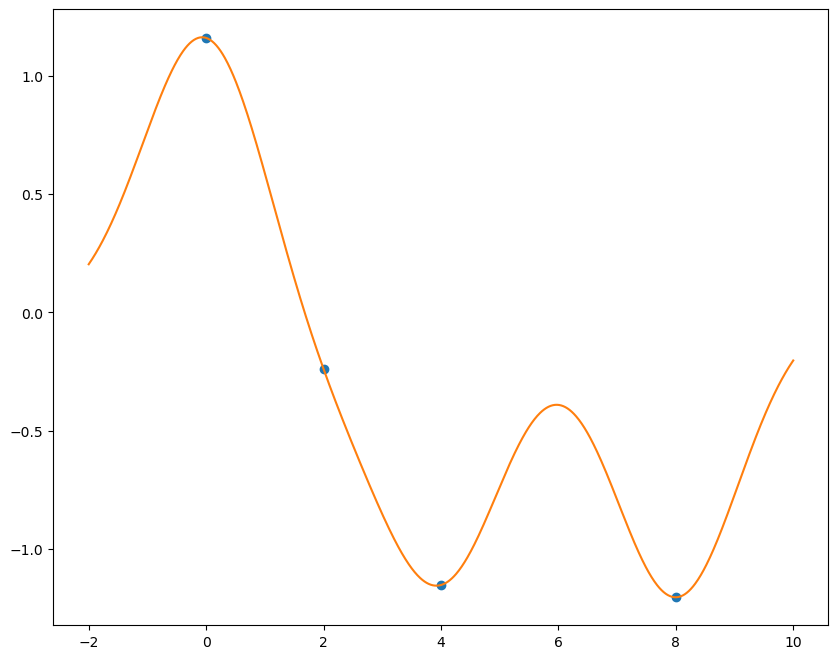

In [6]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
fx,_ = Interp(x,y,c,gauss(sigma))         # calcul de l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx);

<br>
<br>

Tester ensuite le même problème en changeant l'échelle du noyau : on prendra ainsi $h(u)=e^{-u^2/\sigma^2}$ pour $\sigma\in\{0.2,2,4,10\}$. Afficher sur le même graphique les différentes solutions. Tester également l'interpolation avec des noyaux de Cauchy : $h(u)=\frac1{1+u^2/\sigma^2}$.

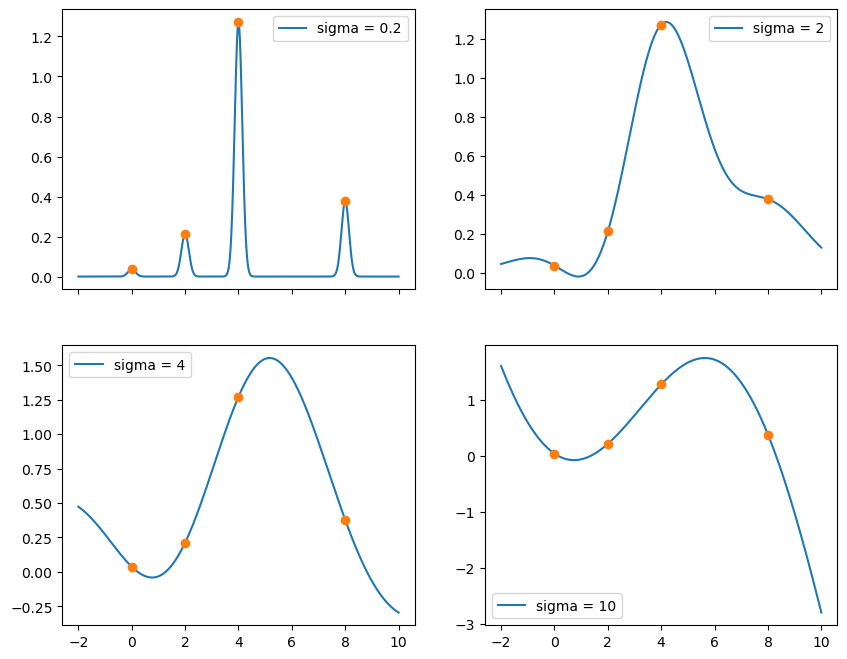

In [7]:
fig, axs = plt.subplots(2,2, sharex = True)
sigma_L = [0.2, 2, 4, 10]
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation

fx,_ = Interp(x,y,c,gauss(0.2))
axs[0][0].plot(x,fx, label = 'sigma = 0.2')
axs[0][0].plot(y,c,'o')                       # 
axs[0][0].legend()

fx,_ = Interp(x,y,c,gauss(2))
axs[0][1].plot(x,fx, label = 'sigma = 2')
axs[0][1].plot(y,c,'o')                       # 
axs[0][1].legend()

fx,_ = Interp(x,y,c,gauss(4))
axs[1][0].plot(x,fx, label = 'sigma = 4')
axs[1][0].plot(y,c,'o')                       # 
axs[1][0].legend()

fx,_ = Interp(x,y,c,gauss(10))
axs[1][1].plot(x,fx, label = 'sigma = 10')
axs[1][1].plot(y,c,'o')                       # 
axs[1][1].legend()

<br>
<br>

__Question 6__ : Effectuer l'interpolation avec un noyau $K_\sigma$ de la première partie, et vérifier numériquement 
que la norme dans $H^1_\sigma$ de la solution est toujours inférieure à la norme d'autres fonctions de $H^1_\sigma$ passant par les points (par exemple les solutions du problème d'interpolation avec d'autres noyaux).

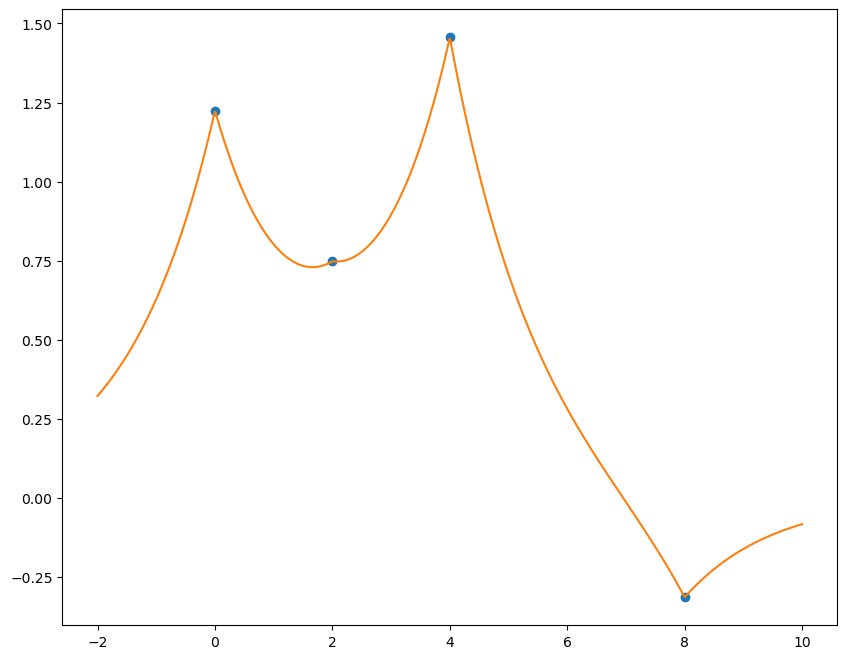

In [8]:
def sobolev(sigma):
    def f(u):
        return np.exp(-np.abs(u)/sigma)*1/(2*sigma)
    return f

y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
fx,_ = Interp(x,y,c,sobolev(sigma))         # calcul de l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx);

<br>
<br>

__Question 7__ : Tester à présent l'interpolation dans le cas $d=2$: choisir par exemple $10$ points $y_i$ dans $[0,1]^2$ et des réels $c_i$ tirés aléatoirement, puis évaluer sur une grille uniforme de $100*100$ points que l'on construira avec la commande suivante : `X1, X2 = np.meshgrid(t,t)`

In [9]:
def InterpGrid(X1,X2,y,c,h) :
    p,q = X1.shape
    #define the linear system and solve
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy,c)
    #build x array
    X1_p = X1[0,:]
    X2_p = X2[:,0]
    x = np.array(np.meshgrid(X2_p, X1_p)).T.reshape(-1, 2) 
    Kxy = KernelMatrix(x,y,h)
    # doit renvoyer l'évaluation de l'interpolant à noyau sur les points de la grille X1,X2
    return Kxy @ a

n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points tirés aléatoirement dans [0,1]^2
c = np.random.randn(n,1)   # 10 valeurs aléatoires
t = np.linspace(0,1,100)
X1, X2 = np.meshgrid(t,t)  # grille uniforme de 50*50 points
p,q = np.shape(X1)
fX = InterpGrid(X1,X2,y,c,gauss(sigma))
fX = fX.reshape(p,q)

<br>

Si les valeurs interpolées sont dans le tableau `fX` de taille $100*100$, on affichera ensuite la solution avec

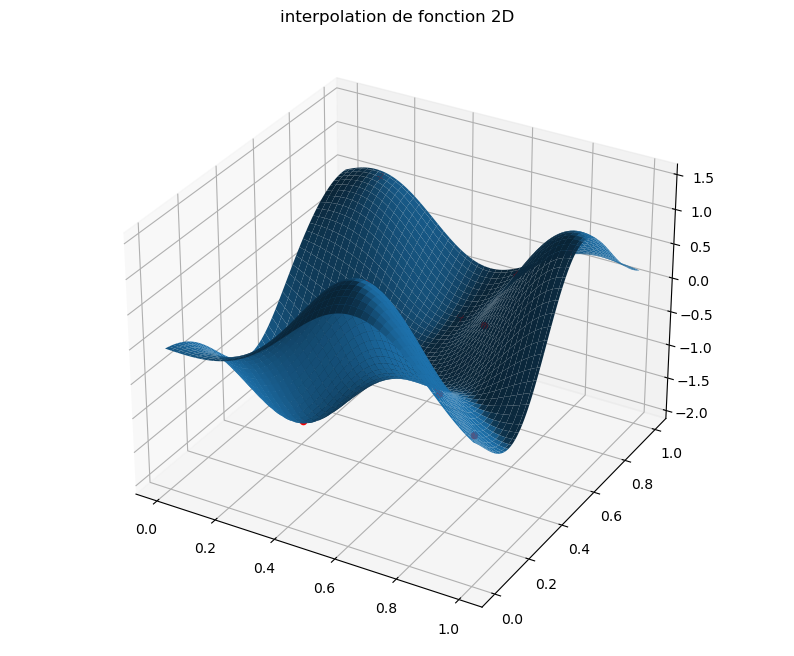

In [10]:
fig = plt.figure()
plt.title("interpolation de fonction 2D")
plt.axis('off')
ax = plt.axes(projection='3d')
ax.plot_surface(X2,X1,fX)
ax.scatter3D(y[:,0],y[:,1],c,c='r',depthshade=False)

<br>
<br>

### Interpolation relaxée

Dans certains cas, les contraintes d'interpolation peuvent s'avérer trop fortes pour la norme de Hilbert utilisée (typiquement lorsque le paramètre d'échelle $\sigma$ est grand par rapport aux positions des points d'interpolation). Numériquement ceci se traduit par une matrice d'interpolation très mal conditionnée. D'autre part les données d'observation peuvent être bruitées, auquel cas une fonction passant exactement par les contraintes n'est plus désirable. Une solution consiste alors à écrire un problème d'interpolation relaxé (_smoothing spline interpolation_) : 

$$\text{Minimiser }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
où $\lambda>0$ est un paramètre à fixer. 

<br>

__Question 8__ : Montrer que la solution de l'interpolation inexacte s'obtient en rajoutant $\lambda$ aux coefficients diagonaux de la matrice du système linéaire.

On rappelle que $\mathcal{H}$ est un ENR, avec K le noyau associé. On se donne une fonction $\Psi$ de $\mathbb{R}^{n+1}$ strictement croissante par rapport à la dernière variable.
Le théorème de représentation dis que résoudre un problème de la forme :
$$
\min \limits_{f \in \mathcal{H}} \Psi(f(\textbf{y}_1), f(\textbf{y}_2), \cdots, f(\textbf{y}_n), ||f||_{\mathcal{H}}^2)
$$
admets une solution de la forme $\forall x \in \Chi, f(\mathbf{x}) = \sum_{i = 1}^{n} \alpha_i K(\mathbf{x},\mathbf{y}_i) = \mathbf{K}\alpha$, où $\mathbf{K}$ est la matrice de taille $n \times n$ telle que $\mathbf{K}_{i,j} = K(\mathbf{y}_i,\mathbf{y}_j)$. Ici, on a évidemment $\Psi(f(\textbf{y}_1), f(\textbf{y}_2), \cdots, f(\textbf{y}_n), ||f||_{\mathcal{H}}^2) = \lambda\left\|f\right\|_{\mathcal{H}}^2+\sum_{i=1}^n(f(\mathbf{y}_i)-c_i)^2$. De la propriété de reproduction, on en déduit immédiatement que $||f||_{\mathcal{H}}^2 = \sum_{i,j = 1}^n \alpha_i\alpha_j K(\mathbf{y_i}, \mathbf{y_j}) = \mathbf{\alpha}^{\top} \mathbf{K} \mathbf{\alpha}$.

Par conséquent, on serait plutôt amener à résoudre le problème : 
$$
\min_{\alpha \in \mathbb{R}^n} \lambda \alpha^{\top}\mathbf{K} \alpha + ||\mathbf{K}\alpha - \mathbf{c}||^2_2
$$
Puisqu'il n'y a pas de contraintes, il suffit de mettre la dérivé à zéro et de résoudre : 
$$
2\lambda \mathbf{K}\alpha + 2 \mathbf{K}^{\top}(\mathbf{K} \alpha - \mathbf{c}) = 0
$$
Puisque $\mathbf{K}$ est symétrique, on a en simplifiant par $2$ :
$$
\mathbf{K}((\lambda \mathbf{I} + \mathbf{K}) \alpha - \mathbf{c})) = 0
$$
Comme $\mathbf{K}$ est une matrice donc de dimension finie, les valeurs propres sont ponctuelles et restent dénombrables. On doit donc choisir 
$\lambda \notin \text{Sp}(\mathbf{K})$, ce qui ne pose bien sur aucune difficulté en pratique. Une fois cette précaution prise, on peut assurer alors qu'une solution devient $\alpha = (\mathbf{K} + \lambda \mathbf{I})^{-1}\mathbf{c}$. On retrouve un système linéaire similaire au cas sans régularisation, mais avec l'ajout de $\lambda$ sur les éléments diagonaux.

<br>

Modifier les fonctions précédentes pour prendre en compte ce nouveau modèle, et le tester sur les exemples précédents et sur l'exemple suivant :
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
avec $h(u)=e^{-u^2/\sigma^2}$ et les jeux de paramètres suivants : $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.

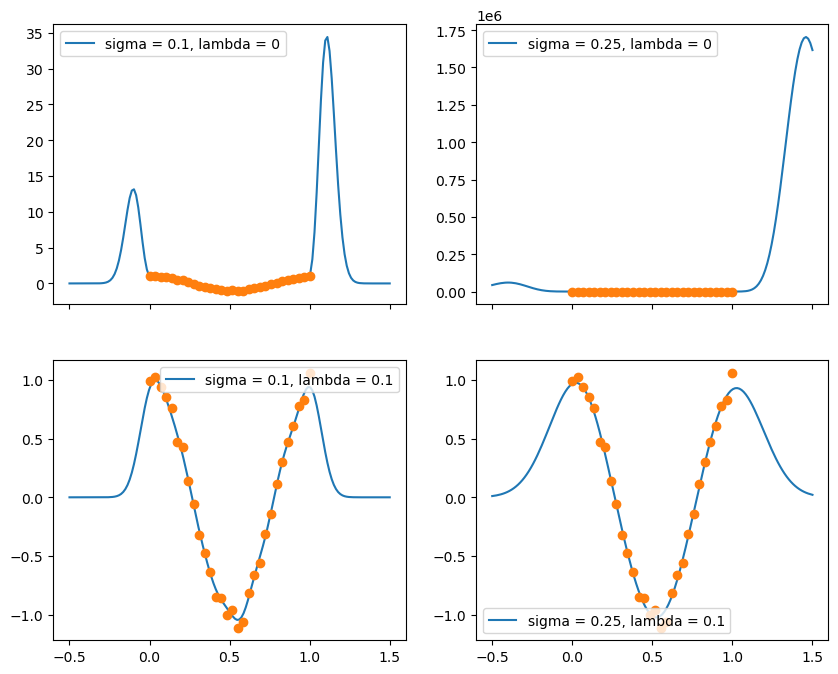

In [11]:
fig, axs = plt.subplots(2,2, sharex = True)

# redéfinition de Interp pour inclure le paramètre lambda
def Interp_reg(x,y,c,h,l=0):
    K = KernelMatrix(y,y,h)
    a = np.linalg.solve(K + l*np.eye(np.shape(y)[0]),c)
    K_interp = KernelMatrix(x,y,h)
    f = np.dot(K_interp,a)
    return f,a

# tests pour différentes valeurs de sigma et de lambda
n = 30
x = np.linspace(-1/2, 3/2, 5*n)[:, None]
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .05*np.random.randn(n,1)

fx,_ = Interp_reg(x,y,c,gauss(0.1))
axs[0][0].plot(x,fx, label = 'sigma = 0.1, lambda = 0')
axs[0][0].plot(y,c,'o')                       # 
axs[0][0].legend()


fx,_ = Interp_reg(x,y,c,gauss(0.25))
axs[0][1].plot(x,fx, label = 'sigma = 0.25, lambda = 0')
axs[0][1].plot(y,c,'o')                       # 
axs[0][1].legend()

fx,_ = Interp_reg(x,y,c,gauss(0.1), l = 0.1)
axs[1][0].plot(x,fx, label = 'sigma = 0.1, lambda = 0.1')
axs[1][0].plot(y,c,'o')                       # 
axs[1][0].legend()

fx,_ = Interp_reg(x,y,c,gauss(0.25), l = 0.1)
axs[1][1].plot(x,fx, label = 'sigma = 0.25, lambda = 0.1')
axs[1][1].plot(y,c,'o')                       # 
axs[1][1].legend(loc = 3)

<br>
<br>

### Problème d'interpolation vectorielle

On suppose à présent que $V$ est un espace de Hilbert de fonctions à valeurs vectorielles $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$. 
S'il existe, le noyau reproduisant $K_V$ de l'espace $V$ est alors une application ${\mathbb R}^d\times{\mathbb R}^d\rightarrow\mathcal{M}_m({\mathbb R})$, définie par la relation: 

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha}\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

La propriété reproduisante s'écrit alors

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha},{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

On considère le problème exact d'interpolation vectorielle suivant: 

$$\text{Minimiser }\left\| v\right\|_V\text{ pour $v\in V$, sous les contraintes }v(y_i)=\gamma_i,$$

où $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ sont fixés, $1\leq i\leq n$. On considère aussi le problème relaxé associé :

$$\text{Minimiser }\gamma\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

__Question 9__ : Montrer que pour un noyau de la forme $K_V(x,y)=h(\|x-y\|)I_m$, les problèmes d'interpolation vectoriels exacts et relaxés sont équivalents à $m$ problèmes d'interpolation scalaires
avec le noyau scalaire $K_H(x,y)=h(\|x-y\|)$ (on supposera que ce noyau $K_H$ est bien le noyau reproduisant d'un espace de Hilbert $H$ de fonctions scalaires).

Il suffit d'utiliser une nouvelle fois le théorème de représentation. On en déduit que la solution est de la forme :
$$
v(x) = \sum_{i = 1}^n K(\mathbf{x}, \mathbf{y}_i)\mathbf{a}_i
$$ où $\mathbf{a}_i \in \mathbf{R}^m$.

Comme on veut naturellement que $v(\mathbf{y}_i) = \gamma_i$, on en déduit de suite que 
$$
\sum_{j = 1}^n K(\mathbf{y}_j, \mathbf{y}_i)\mathbf{a}_j = \mathbf{\gamma}_i
$$
Pour un noyau de la forme sus-mentionnée, en raisonnant composante par composante, on en déduit que l'on a en réalité là $m$ systèmes d'équations, où chacun de ces systèmes contient $n$ équations: 
$$
\forall k \in \{1, \cdots ,m\}, \forall i \in \{1, \cdots, n\}, \sum_{j = 1}^n h(||\mathbf{y}_i - \mathbf{y}_j||) [a_{j}]_{k} = [\gamma_{i}]_k
$$
Par conséquent, nous avons $m$ problèmes d'interpolations distincts, et chacun d'entre eux comportent $n$ points à interpoler. Comme espéré, grâce à la géométrie euclidienne de $\mathbf{R}^m$ et le fait que $K$ soit diagonale, on a pu découpler le système.
On raisonne exactement de la même manière pour le problème régularisé.

<br>

Si besoin, modifier la fonction `Interp` pour qu'elle puisse aussi résoudre les problèmes d'interpolation vectorielle.

In [12]:
# redéfinition de Interp pour le problème vectoriel

def Interp2Grid(X1,X2,y,c,h,m=1,l=0) :
    p,q = X1.shape
    #define the linear system and solve
    Kyy = KernelMatrix(y,y,h)
    a = np.empty((m,np.shape(y)[0]))
    for i in range(m):
        a[i] = np.linalg.solve(Kyy + l*np.eye(np.shape(y)[0]),c[:,i])
    #build x array
    X1_p = X1[0,:]
    X2_p = X2[:,0]
    x = np.array(np.meshgrid(X1_p, X2_p)).T.reshape(-1, 2) 
    Kxy = KernelMatrix(x,y,h)
    # doit renvoyer l'évaluation de l'interpolant à noyau sur les points de la grille X1,X2
    return Kxy @ a[0,:], Kxy @ a[1,:]

<br>

__Question 10__ : Tester la fonction `Interp` avec $d=m=2$: générer des points $y_i$ dans $[0,1]^2$ (commencer avec $n=3$), des vecteurs $\gamma_i$ avec la commande `gamma = 0.05*np.random.randn(n,d)` puis évaluer sur une grille uniforme de taille 20*20. Afficher le champ de vecteurs obtenu avec la fonction `quiver` de Matplotlib.

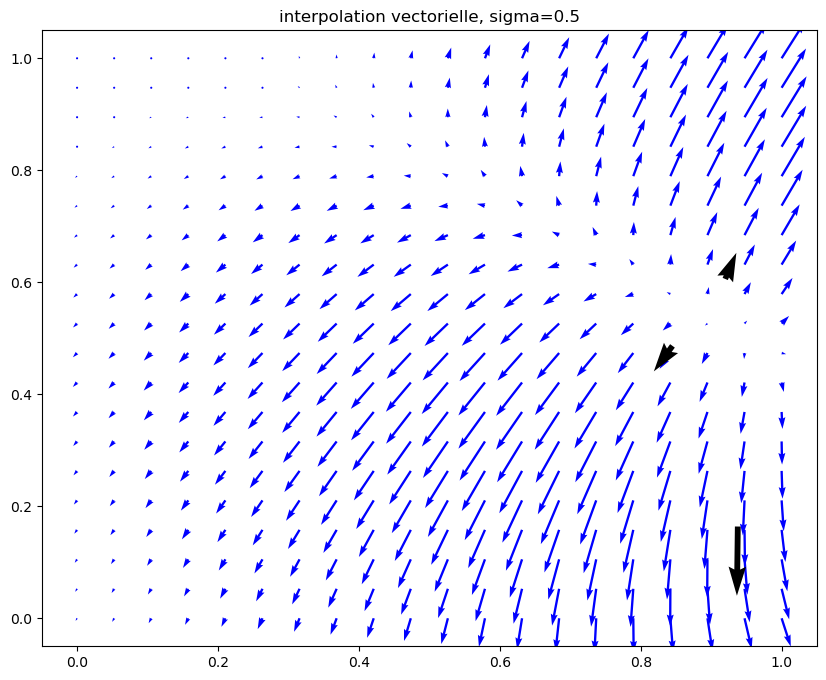

In [13]:
n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = Interp2Grid(X1,X2,y,gamma,gauss(sigma),m)
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X2,X1,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1]);


<br>
<br>

## Appariement de points labellisés

### Appariement linéaire

Le problème d'interpolation vectorielle précédent, pour $d=m$, peut être vu comme un problème d'appariement de points. Pour la version "exacte", ceci s'écrit :
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

On se ramène simplement au problème précédent en posant $\gamma_i=z_i-y_i$.

<br>

__Question 11__ : On se place dans le plan ($d=m=2$). Reprendre l'exemple de la question précédente, en affichant cette fois dans un même graphique les points $y_i$ et $z_i$ et visualiser la solution $\phi$ en calculant et en affichant le déplacement d'une grille de points.

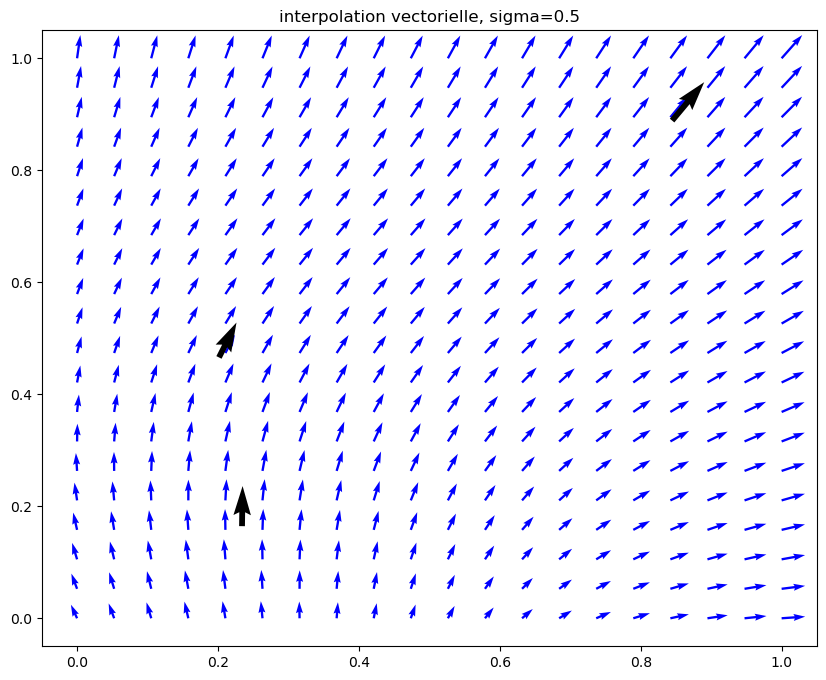

In [14]:
n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
z = np.random.rand(n,d)
gamma = z - y
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = Interp2Grid(X1,X2,y,gamma,gauss(sigma),m)
Phi1 = X2.reshape(20**2) + V1
Phi2 = X1.reshape(20**2) + V2
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X2,X1,Phi1,Phi2,color='b')
plt.quiver(y[:,0],y[:,1],z[:,0],z[:,1]);

<br>

__Question 12__ : Charger le fichiers `hand1.mat` et `hand2.mat` avec les commandes :

In [17]:
import scipy.io
C1 = scipy.io.loadmat('hand1.mat')['C1']
C2 = scipy.io.loadmat('hand2.mat')['C2']

Les tableaux `C1` et `C2` 
contiennent les coordonnées de deux contours de mains. Avec le code suivant, sélectionner des points de référence (extrémités des doigts, etc.) pour chacun :

In [16]:
# %matplotlib tk
# plt.rcParams["figure.figsize"] = (10,8)
# plt.figure()
# plt.plot(C1[:,0],C1[:,1])
# plt.title("Sélectionner les points y_i puis appuyer sur Entrée")
# y = np.array(plt.ginput(0))
# plt.plot(y[:,0],y[:,1],'o')
# plt.show()
# print("y=",y)

# plt.figure()
# plt.plot(C2[:,0],C2[:,1])
# plt.title("Sélectionner les points z_i puis appuyer sur Entrée")
# z = np.array(plt.ginput(0))
# plt.plot(z[:,0],z[:,1],'o')
# plt.show()
# print("z=",z)

<br>

Réaliser l'appariement des deux ensembles de points puis afficher sur un même graphique la courbe $C_2$ et ses points de référence, la courbe transformée $\phi(C_1)$ et le déplacement d'une grille de points.

<br>
<br>

## Ajout des déplacements affines et modèle Thin Plate Splines

Il est possible d'ajouter au modèle les déplacements affines. Le problème d'appariement exact devient alors:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

où $B$ est une matrice carrée de taille $d$ et $c$ un vecteur. On peut montrer que le champ de vecteur optimal s'écrit toujours comme une combinaison linéaire des noyaux $K_V(\cdot,y_i)$.

<br>

__Question 13__ : Trouver le système linéaire à résoudre pour obtenir les coefficients des vecteurs $\alpha_i$, $c$, et de la matrice $B$ (_indication : considérer les conditions de Karush-Kuhn-Tucker à l'optimum pour obtenir les équations manquantes_), puis implémenter cet appariement. Reprendre l'exemple des contours de mains avec ce nouveau modèle. 

<br>

__Question 14__ : Tester à présent ce nouveau modèle avec le noyau $h(r)=r^2\log(r)$. Ce noyau n'est pas de type positif mais semi-positif, et n'est utilisable qu'en incluant les transformations affines. C'est le modèle de spline "plaque mince" (TPS: Thin Plate Splines).